Flu Mortality Impact Analysis 2006-2016
Project Milestone 2
Saurabh Biswas
DSC540-T303

‘Deaths in 122 U.S. cities - 1962-2016. 122 Cities Mortality Reporting System’ is a csv file contains mortality data for 122 US cities along with their states from 1962-2016. It breaks down data at week level. 
It has several columns with mortality data – Total Deaths, Flu Deaths, and Deaths at different age group.

Load csv data into a pandas dataframe after replacing the headers with more meaningful and easily accessible names.

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
import datetime
import calendar


In [3]:
# Header names list
my_col_names = ['Year', 'Week_of_the_Year','Week_End_Date', 'Region_Code','State','City','Flu_Deaths', 'All_Deaths',
               'Deaths_Age_Group_Under_1','Deaths_Age_Group_1_to_24','Deaths_Age_Group_25_to_44',
                'Deaths_Age_Group_45_to_64','Deaths_Age_Group_Above_65']

In [4]:
#read csv into dataframe after replacing the header with a pre-defined names
df1 = pd.read_csv("Deaths_in_122_U.S._cities_-_1962-2016._122_Cities_Mortality_Reporting_System.csv", 
                  header = 0, names = my_col_names)
df1.head(5) # take glimpse of the data

,Year,Week_of_the_Year,Week_End_Date,Region_Code,State,City,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,1962,1,01/06/1962,1,MA,Boston,11.0,262.0,10.0,8.0,11.0,87.0,146.0
1,1962,2,01/13/1962,1,MA,Boston,11.0,270.0,14.0,8.0,11.0,70.0,167.0
2,1962,3,01/20/1962,1,MA,Boston,5.0,237.0,11.0,8.0,10.0,66.0,142.0
3,1962,4,01/27/1962,1,MA,Boston,12.0,285.0,22.0,7.0,8.0,73.0,175.0
4,1962,5,02/03/1962,1,MA,Boston,5.0,245.0,15.0,9.0,17.0,62.0,142.0


For my project I'm going to analyze data from Year 2000 till 2016. So We will select observations for slected Years only.

In [5]:
df1 = df1[(df1.Year >= 2005) & (df1.Year <=2016)]
df1.shape # total observations

(73647, 13)

Any NaN or Null observations for any of the variables ?

In [6]:
df1.isnull().sum()

Year                            0
Week_of_the_Year                0
Week_End_Date                   0
Region_Code                     0
State                           0
City                            0
Flu_Deaths                   2135
All_Deaths                    322
Deaths_Age_Group_Under_1     6240
Deaths_Age_Group_1_to_24     5819
Deaths_Age_Group_25_to_44    2482
Deaths_Age_Group_45_to_64     531
Deaths_Age_Group_Above_65     348
dtype: int64

Flu_Deaths and All_Deaths are important variables for my analysis. So I will drop the entire row having NaN or Null on any of the observations of these two variables.

In [7]:
df1=df1.dropna(subset=['Flu_Deaths','All_Deaths']) # drop NaN
df1.shape # new umber of observations

(71511, 13)

I'm going to replace all NaN values for observations of deaths count by age group with their respective mean.

In [8]:
df1.fillna(df1.mean(), inplace=True)
df1.isnull().sum()

Year                         0
Week_of_the_Year             0
Week_End_Date                0
Region_Code                  0
State                        0
City                         0
Flu_Deaths                   0
All_Deaths                   0
Deaths_Age_Group_Under_1     0
Deaths_Age_Group_1_to_24     0
Deaths_Age_Group_25_to_44    0
Deaths_Age_Group_45_to_64    0
Deaths_Age_Group_Above_65    0
dtype: int64

I will extract the Month from Week_End_Date. This will help me to gather data at each Months level. I will also delete Week_End_Date and Week_of_the_Year columns.

In [9]:
df1['Month'] = pd.DatetimeIndex(df1['Week_End_Date']).month # Extract month from Week_End_date

df1=df1.drop(columns=['Week_End_Date', 'Week_of_the_Year']) # drop column that is not needed

df1.head(5) # glimpse of new data

,Year,Region_Code,State,City,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65,Month
2244,2005,1,MA,Boston,27.0,174.0,4.0,1.0,7.0,38.0,124.0,1
2245,2005,1,MA,Boston,28.0,189.0,6.0,3.0,17.0,39.0,124.0,1
2246,2005,1,MA,Boston,18.0,154.0,7.0,2.0,13.0,36.0,96.0,1
2247,2005,1,MA,Boston,21.0,164.0,2.0,5.0,10.0,29.0,118.0,1
2248,2005,1,MA,Boston,20.0,182.0,9.0,4.0,9.0,33.0,127.0,2


I will get the various death counts groupby at Year, Month & State level. This will also make sure there are no duplicates on Year+Month+State.

In [10]:
df1=df1.groupby(['Year','Month','State'],as_index=False)["Flu_Deaths","All_Deaths","Deaths_Age_Group_Under_1", 
                                                         "Deaths_Age_Group_1_to_24","Deaths_Age_Group_25_to_44",
                                                         "Deaths_Age_Group_45_to_64", 
                                                         "Deaths_Age_Group_Above_65"].sum()
df1

,Year,Month,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2005,1,AL,114.0,1413.0,27.0,34.0,89.0,317.0,946.0
1,2005,1,AR,18.0,369.0,13.0,8.0,16.0,84.0,248.0
2,2005,1,AZ,63.0,906.0,20.0,20.0,50.0,170.0,645.0
3,2005,1,CA,577.0,5386.0,78.0,109.0,297.0,1085.0,3817.0
4,2005,1,CO,59.0,799.0,31.0,21.0,47.0,156.0,544.0
...,...,...,...,...,...,...,...,...,...,...
5665,2016,10,TX,62.0,1092.0,27.0,19.0,72.0,263.0,711.0
5666,2016,10,UT,15.0,176.0,1.0,4.0,18.0,42.0,111.0
5667,2016,10,VA,2.0,118.0,1.0,3.0,2.0,31.0,81.0
5668,2016,10,WA,12.0,205.0,1.0,4.0,11.0,45.0,144.0


Replace integer months with abbrieviated month name.

In [11]:
df1['Month'] = df1['Month'].apply(lambda x: calendar.month_abbr[x])
df1.head(5)

,Year,Month,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2005,Jan,AL,114.0,1413.0,27.0,34.0,89.0,317.0,946.0
1,2005,Jan,AR,18.0,369.0,13.0,8.0,16.0,84.0,248.0
2,2005,Jan,AZ,63.0,906.0,20.0,20.0,50.0,170.0,645.0
3,2005,Jan,CA,577.0,5386.0,78.0,109.0,297.0,1085.0,3817.0
4,2005,Jan,CO,59.0,799.0,31.0,21.0,47.0,156.0,544.0


I will use boxplot to see if there are any outliers. I'm going to verify 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1a6c9510>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1a6c9f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x114c03b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1a6d89d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1a6d8ed0>],
 'means': []}

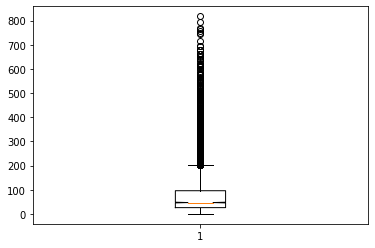

In [12]:
plt.boxplot(df1.Flu_Deaths, notch=True) # boxpot

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1a62f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1a6354d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1a623d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1a635f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1a623d90>],
 'means': []}

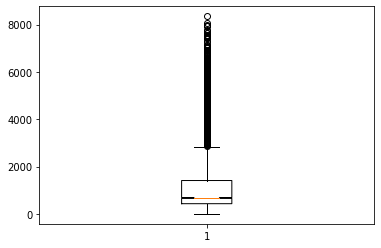

In [13]:
plt.boxplot(df1.All_Deaths, notch=True) # boxpot

From the above boxplots we can see we have outliers for both of these variable. I will calculate zscores of these two variables and drop all the rows having > 3 or < -3 zscores.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1874c390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1874ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a187436d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a187538d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a18753dd0>],
 'means': []}

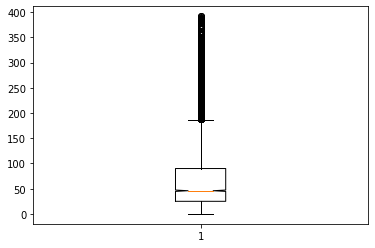

In [14]:
zscore_Flu_Deaths = stats.zscore(df1.Flu_Deaths) # calculate zscore 
df2 = df1[(abs(zscore_Flu_Deaths) < 3)] # drop rows with zscore > 3
df2.shape
plt.boxplot(df2.Flu_Deaths, notch=True) # boxpot

{'whiskers': [<matplotlib.lines.Line2D at 0x1a172de190>,
 'caps': [<matplotlib.lines.Line2D at 0x1a172debd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a172d94d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a172e8650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a172e8b50>],
 'means': []}

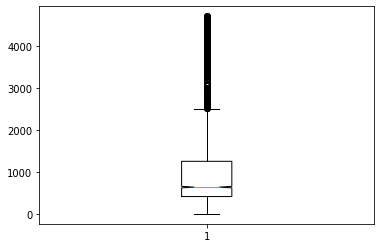

In [15]:
zscore_All_Deaths = stats.zscore(df2.All_Deaths) # calculate zscore 
df2 = df2[(abs(zscore_All_Deaths) < 3)] # drop rows with zscore > 3
df2.shape
plt.boxplot(df2.All_Deaths, notch=True) # boxpot

My final dataset after performing few cleansing and transformation steps

In [16]:
df2

,Year,Month,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2005,Jan,AL,114.0,1413.0,27.0,34.0,89.0,317.0,946.0
1,2005,Jan,AR,18.0,369.0,13.0,8.0,16.0,84.0,248.0
2,2005,Jan,AZ,63.0,906.0,20.0,20.0,50.0,170.0,645.0
4,2005,Jan,CO,59.0,799.0,31.0,21.0,47.0,156.0,544.0
5,2005,Jan,CT,104.0,739.0,11.0,4.0,36.0,138.0,550.0
...,...,...,...,...,...,...,...,...,...,...
5665,2016,Oct,TX,62.0,1092.0,27.0,19.0,72.0,263.0,711.0
5666,2016,Oct,UT,15.0,176.0,1.0,4.0,18.0,42.0,111.0
5667,2016,Oct,VA,2.0,118.0,1.0,3.0,2.0,31.0,81.0
5668,2016,Oct,WA,12.0,205.0,1.0,4.0,11.0,45.0,144.0


In [17]:
df3=df2.groupby(['Year','Month'],as_index=False)["Flu_Deaths","All_Deaths","Deaths_Age_Group_Under_1", 
                                                         "Deaths_Age_Group_1_to_24","Deaths_Age_Group_25_to_44",
                                                         "Deaths_Age_Group_45_to_64", 
                                                         "Deaths_Age_Group_Above_65"].sum()
df3

,Year,Month,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2005,Apr,3068.0,38827.0,836.0,892.0,2644.0,8482.0,25922.0
1,2005,Aug,2190.0,38327.0,898.0,1082.0,2814.0,8832.0,24684.0
2,2005,Dec,2645.0,40492.0,864.0,978.0,2617.0,9179.0,26841.0
3,2005,Feb,2758.0,33982.0,725.0,758.0,2081.0,7139.0,23226.0
4,2005,Jan,2672.0,34979.0,701.0,717.0,2180.0,7643.0,23703.0
...,...,...,...,...,...,...,...,...,...
137,2016,Jun,1992.0,34138.0,607.0,807.0,2280.0,8053.0,22379.0
138,2016,Mar,2490.0,33396.0,507.0,674.0,2082.0,7929.0,22195.0
139,2016,May,2343.0,35509.0,633.0,799.0,2378.0,8492.0,23197.0
140,2016,Oct,631.0,11094.0,190.0,236.0,767.0,2453.0,7443.0


In [18]:
df3.to_csv('Year_Data.csv', encoding='utf-8', index=False)

In [19]:
df4 = df1[(df1.Year >= 2013) & (df1.Year <=2016)]

df4=df4.groupby(['Year','State'],as_index=False)["Flu_Deaths","All_Deaths","Deaths_Age_Group_Under_1", 
                                                         "Deaths_Age_Group_1_to_24","Deaths_Age_Group_25_to_44",
                                                         "Deaths_Age_Group_45_to_64", 
                                                         "Deaths_Age_Group_Above_65"].sum()

df4

,Year,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2013,AL,1226.0,16463.0,313.0,329.0,994.0,4047.0,10776.0
1,2013,AR,220.0,4452.0,106.0,109.0,280.0,1122.0,2835.0
2,2013,AZ,824.0,17635.0,272.0,442.0,1152.0,4070.0,11631.0
3,2013,CA,5778.0,64570.0,1025.0,1243.0,3342.0,13583.0,45363.0
4,2013,CO,364.0,10115.0,197.0,193.0,611.0,2297.0,6815.0
...,...,...,...,...,...,...,...,...,...
155,2016,TX,2505.0,45468.0,843.0,1115.0,3245.0,10951.0,29307.0
156,2016,UT,538.0,7435.0,140.0,196.0,563.0,1545.0,4990.0
157,2016,VA,152.0,3698.0,82.0,58.0,162.0,1002.0,2394.0
158,2016,WA,557.0,8149.0,79.0,118.0,374.0,1688.0,5825.0


In [20]:
df4.to_csv('Year_State_Data.csv', encoding='utf-8', index=False)